<a href="https://colab.research.google.com/github/waseda-ken/data_analyze_kikagaku/blob/main/%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92%E2%91%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 教師あり学習：分類

## 決定木の実装

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
dataset = load_iris()
x = dataset.data
t = dataset.target
feature_names = dataset.feature_names

In [ ]:
# 読み込んだデータセットを DataFrame に変換
df = pd.DataFrame(data=x, columns=feature_names)
df['Target'] = t

df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
# t のユニークな値を確認
np.unique(t)

array([0, 1, 2])

In [ ]:
x.shape, t.shape


((150, 4), (150,))

In [ ]:
# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [ ]:
# モデルの定義
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

In [ ]:
# モデルの学習
dtree.fit(x_train, t_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# モデルの検証
print('train score : ', dtree.score(x_train, t_train))
print('test score : ', dtree.score(x_test, t_test))


train score :  1.0
test score :  0.9777777777777777


In [ ]:
# 推論
dtree.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

## 決定木の特徴

強み	解釈が容易。必要な前処理が少ない。


弱み	過学習になる場合が多く、汎用性の低いモデルになる傾向がある。


主なハイパーパラメータ
max_depth（木構造の深さの上限）	過学習を抑えるためのハイパーパラメータ。上限が低いとモデルの表現力は低下し、過学習を抑える。


min_samples_split（木構造の分岐先の値）	分岐先のノード数の最低値を設定するハイパーパラメータ。過学習に陥る可能性が上がるので調整が必要。

In [ ]:
# 木構造の書き出し
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree)

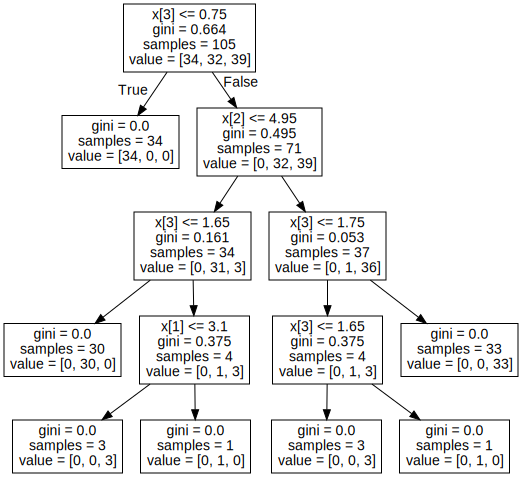

In [ ]:
# 木構造の表示
graph_tree = graphviz.Source(dot_data)
graph_tree

In [ ]:
# feature importance
feature_importance = dtree.feature_importances_
feature_importance


array([0.        , 0.02150464, 0.39766951, 0.58082584])

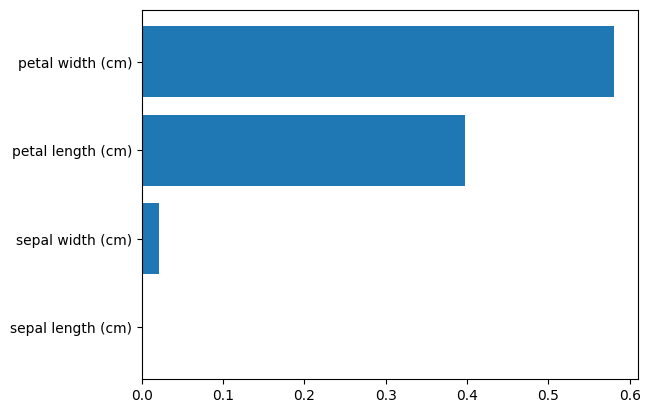

In [ ]:
# 可視化
y = feature_names
width = feature_importance

# 横向きで表示
plt.barh(y=y, width=width);

## サポートベクトルマシン

強み	未知のデータへの識別性能が比較的強い。ハイパーパラメータの数が少ない。


弱み	学習する際に必ずデータの標準化（もしくは正規化）を行う必要がある。


主なハイパーパラメータ
C（コストパラメータ）	誤った予測に対するペナルティ。大き過ぎると過学習を起こす。


gamma（ガンマ）	モデルの複雑さを決定する。値が大きくなるほどモデルが複雑になり過学習を起こす。

In [ ]:
# モデルの定義
from sklearn.svm import SVC
svc = SVC()

In [ ]:
# モデルの学習
svc.fit(x_train, t_train)

SVC()

In [ ]:
# モデルの検証
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

train score :  0.9714285714285714
test score :  0.9777777777777777


## 標準化

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [ ]:
std_scaler.fit(x_train)

StandardScaler()

In [ ]:
# 標準化
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

In [ ]:
# 平均
round(x_train_std.mean())

0

In [ ]:
# 標準偏差
round(x_train_std.std())

1

In [ ]:
# モデルの定義
svc_std = SVC()

In [ ]:
# モデルの学習
svc_std.fit(x_train_std, t_train)

SVC()

In [ ]:
# モデルの検証
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

print('train score scaling : ', svc_std.score(x_train_std, t_train))
print('test score scaling : ', svc_std.score(x_test_std, t_test))

train score :  0.9714285714285714
test score :  0.9777777777777777
train score scaling :  0.9714285714285714
test score scaling :  0.9777777777777777


## ロジスティック回帰

強み	説明能力が高い。入力変数の重要度、オッズ比がわかる。


弱み	線形分類器のため、複雑な問題設定に対応できない場合がある。


主なハイパーパラメータ
C（コストパラメータ）	誤った予測に対するペナルティ。大きすぎると過学習を起こす。


penalty	正則化を行う方法を決定する。
L1,L2,のノルムから選択する。

In [ ]:
# モデルの定義
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0)

In [ ]:
# モデルの学習
log_reg.fit(x_train, t_train)

LogisticRegression()

In [ ]:
# モデルの検証
print('train score : ', log_reg.score(x_train, t_train))
print('test score : ', log_reg.score(x_test, t_test))

train score :  0.9809523809523809
test score :  0.9777777777777777


In [ ]:
log_reg.coef_.shape

(3, 4)

In [ ]:
# 切片
log_reg.intercept_

array([  8.98455618,   1.54783906, -10.53239524])

## オッズ比

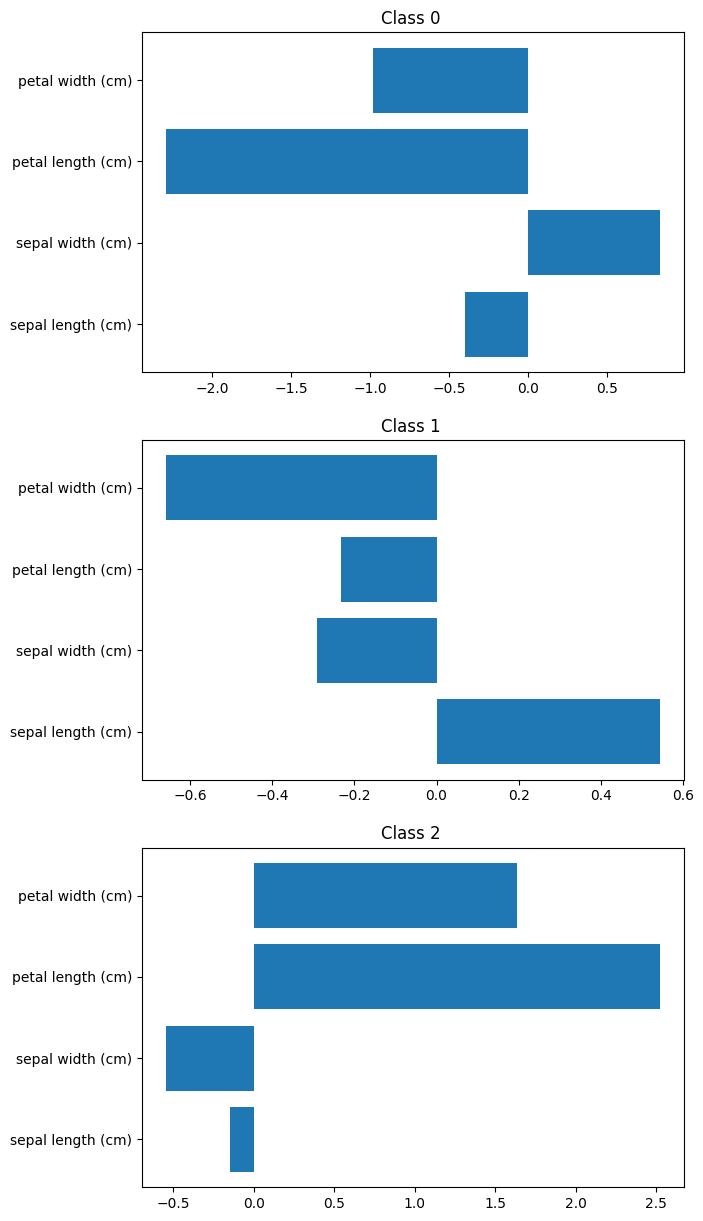

In [ ]:
# それぞれの重みを確認
fig = plt.figure(figsize=(7, 15))

for i in range(len(log_reg.coef_)):
    ax = fig.add_subplot(3, 1, i+1)
    ax.barh(y=dataset.feature_names, width=log_reg.coef_[i])
    ax.set_title('Class {} '.format(i))

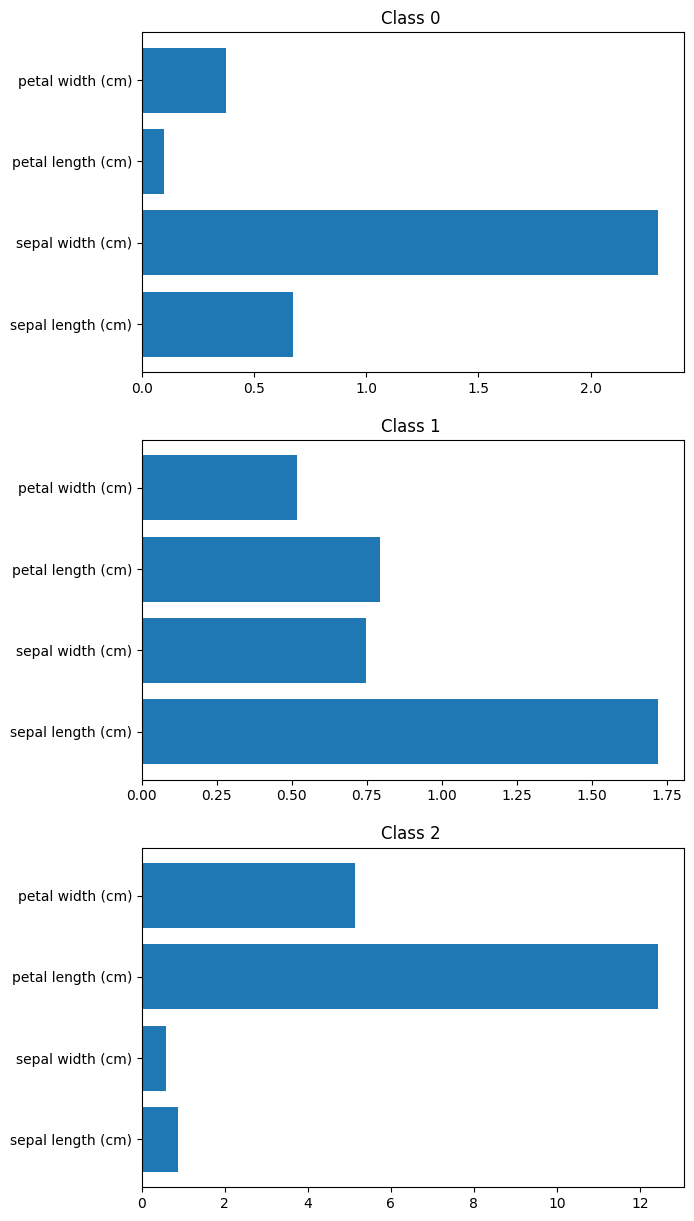

In [ ]:
# 各オッズ比を確認
fig = plt.figure(figsize=(7, 15))

for i in range(len(log_reg.coef_)):
    ax = fig.add_subplot(3, 1, i+1)
    odds_ratio = np.exp(log_reg.coef_[i])
    ax.barh(y=dataset.feature_names, width=odds_ratio)
    ax.set_title('Class {} '.format(i))

In [ ]:
# カテゴリ 0 の場合
print('重み(係数):',log_reg.coef_[0])
print('オッズ比:',  np.exp(log_reg.coef_[0]))

重み(係数): [-0.39547369  0.83378685 -2.28885885 -0.97846082]
オッズ比: [0.673361   2.30201966 0.10138209 0.37588921]


In [ ]:
# 目標値の取得
log_reg.predict([x_test[0]])

array([2])

## アンサンブル学習


*   バギング
*   ブースティング
*   スタッキング


*   リスト項目



## バギング：ランダムフォレスト

強み	比較的良い精度を出す傾向がある。

弱み	決定木と比較して可読性が弱い

主なハイパーパラメータ

n_estimators	弱学習器の数を決定する


In [ ]:
# モデルの定義
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=0)

In [ ]:
# モデルの学習
model.fit(x_train, t_train)

RandomForestClassifier(max_depth=2, n_estimators=3, random_state=0)

In [ ]:
# モデルの検証
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.9523809523809523
test score :  0.9555555555555556


In [ ]:
# 特徴量重要度の確認
model.feature_importances_

array([0.18666585, 0.        , 0.32209545, 0.4912387 ])

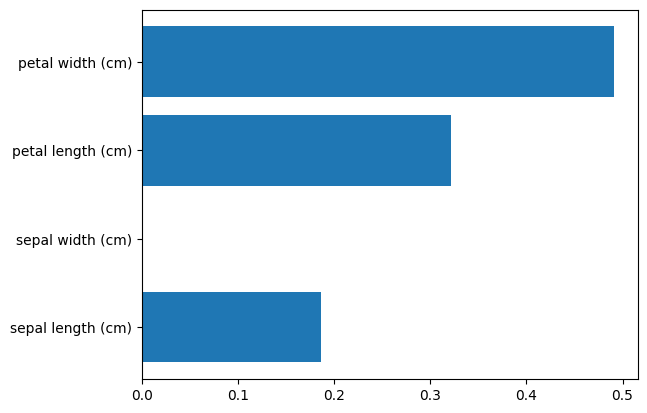

In [ ]:
# 可視化
y = feature_names
width = model.feature_importances_

# 横向きで表示
plt.barh(y=y, width=width);

## ブースティング：XGBoost
強み	精度が高い。欠損値をそのまま扱うことができる。

弱み	決定木と比較して可読性が低い

主なハイパーパラメータ

n_estimators	弱学習器の数を決定する

subsample	ランダムに抽出するサンプルの割合


In [ ]:
# モデルの定義
from xgboost import XGBClassifier
model = XGBClassifier()

# モデルの学習
model.fit(x_train, t_train)

# モデルの検証
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  1.0
test score :  0.9777777777777777


## テスト

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# 固定乱数シード
clf = DecisionTreeClassifier(random_state=0)

# データ読み込み
train = pd.read_csv('wine_class_train.csv')
test = pd.read_csv('wine_class_test.csv')

# 特徴量と目標値に分割 ('Class' が目標値)
X_train = train.drop('Class', axis=1)
y_train = train['Class']
X_test = test.copy()

# モデル学習および予測
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

# 提出用ファイル保存（Windows向けに lineterminator='\n' 指定）
pd.Series(preds, name='pred').to_csv('submission.csv', index=None, lineterminator='\n')

# 提出ファイルの一部を表示
submission = pd.read_csv('submission.csv')
print(submission.head())


   pred
0     1
1     3
2     1
3     1
4     2


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# データ読み込み
train = pd.read_csv('wine_class_train.csv')

# 特徴量と目標値
X_train = train.drop('Class', axis=1)
y_train = train['Class']

# モデル学習
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# 特徴量重要度取得
importances = clf.feature_importances_
features = X_train.columns

# DataFrame化してソート
imp_df = pd.DataFrame({'feature': features, 'importance': importances})
imp_df = imp_df.sort_values('importance', ascending=False)

# 最も重要度の高い特徴量と重要度（生値および丸め）
top_feature = imp_df.iloc[0]
importance_raw = top_feature['importance']
importance_rounded = round(importance_raw, 2)

# 結果出力
print("Most important feature:", top_feature['feature'])
print("Raw importance:", importance_raw)
print("Rounded (2 decimal places):", importance_rounded)


Most important feature: Flavanoids
Raw importance: 0.417537798818587
Rounded (2 decimal places): 0.42
